In [25]:
# Load pytorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt




# what I learnt:

*   dataloader and torchvision transforms

*   Preloaded vision transforms

# What I could have done better:


*   
*   List item





In [2]:
# split to training and test data
train_data = FashionMNIST(root = 'data/', download = True, train = True, transform = ToTensor())
test_data = FashionMNIST(root = 'data/', download = True, train = False, transform=ToTensor())

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.06MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.4MB/s]


In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [4]:
#Wrap in dataloader to split batch size

train_dataloader = DataLoader(train_data, batch_size = 64, shuffle = True, num_workers = 2)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False,num_workers = 2)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


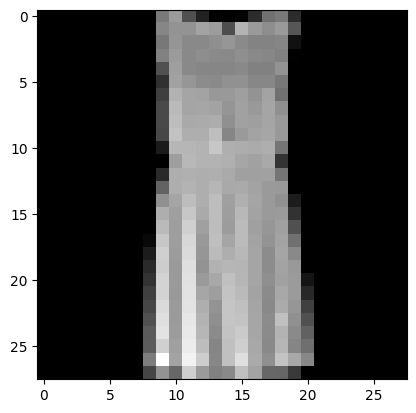

Label: Dress


In [5]:
# visualising stuff in the train features
import matplotlib.pyplot as plt
train_data, train_label = next(iter(train_dataloader)) # runs through the iterable dataloader
print(f"Feature batch shape: {train_data.size()}")
print(f"Labels batch shape: {train_label.size()}")
img = train_data[1].squeeze()
label = train_label[1]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

# what I learnt:
1. next and iter

#what i could do better:
1. look to see whether I can find a modular code for any manual process i can build.

In [9]:
# Build model
# 1. Define model architecture
# 2. Work on working on input flow into the model after designing model architecture.
# 3. work on seeing if there are helper functions

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding= 1)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding =1)
    self.conv3 = nn.Conv2d(in_channels =12, out_channels = 32, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.dropout = nn.Dropout(p=0.2)
    self.fc1 = nn.LazyLinear(out_features= 1024)
    self.fc2 = nn.LazyLinear(out_features= 10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.dropout(x)
    x = self.fc2(x)

    return x

# what I could have done better:
first pull out the formula for calculating the shape of the pixel arrays.
when designing the architecture.  
pick up a pen and paper and design the architecture and it's part or if using a notion note, just design in there.

# what i learnt:
LazyLinear to avoid calculating input shape

In [10]:
model = CNN()

In [11]:
from torch.optim import Adam
optimizer = Adam(model.parameters(),lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

In [12]:
epochs = 100
train_loss = []
train_acc = []
test_loss = []
test_acc = []
model.train()  # set training mode

for epoch in range(epochs):
    epoch_loss = 0
    epoch_correct = 0
    epoch_total = 0

    for x, y in train_dataloader:
        optimizer.zero_grad()
        y_pred = model(x)                      # call model safely
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

        # accumulate metrics
        epoch_loss += loss.item() * x.size(0)
        epoch_correct += (y_pred.argmax(1) == y).sum().item()
        epoch_total += x.size(0)

    train_loss.append(epoch_loss / epoch_total)
    train_acc.append(epoch_correct / epoch_total)

    print(f"Epoch {epoch+1}/{epochs} — Loss: {train_loss[-1]:.4f}, Acc: {train_acc[-1]:.4f}")


Epoch 1/100 — Loss: 0.6982, Acc: 0.7381
Epoch 2/100 — Loss: 0.5303, Acc: 0.8115
Epoch 3/100 — Loss: 0.5072, Acc: 0.8157
Epoch 4/100 — Loss: 0.4930, Acc: 0.8229
Epoch 5/100 — Loss: 0.4880, Acc: 0.8258
Epoch 6/100 — Loss: 0.4849, Acc: 0.8264
Epoch 7/100 — Loss: 0.4801, Acc: 0.8262
Epoch 8/100 — Loss: 0.4756, Acc: 0.8286
Epoch 9/100 — Loss: 0.4687, Acc: 0.8306
Epoch 10/100 — Loss: 0.4735, Acc: 0.8284
Epoch 11/100 — Loss: 0.4664, Acc: 0.8328
Epoch 12/100 — Loss: 0.4698, Acc: 0.8297
Epoch 13/100 — Loss: 0.4627, Acc: 0.8318
Epoch 14/100 — Loss: 0.4641, Acc: 0.8312
Epoch 15/100 — Loss: 0.4605, Acc: 0.8337
Epoch 16/100 — Loss: 0.4651, Acc: 0.8325
Epoch 17/100 — Loss: 0.4493, Acc: 0.8382
Epoch 18/100 — Loss: 0.4597, Acc: 0.8335
Epoch 19/100 — Loss: 0.4658, Acc: 0.8332
Epoch 20/100 — Loss: 0.4488, Acc: 0.8387
Epoch 21/100 — Loss: 0.4635, Acc: 0.8330
Epoch 22/100 — Loss: 0.4533, Acc: 0.8357
Epoch 23/100 — Loss: 0.4531, Acc: 0.8369
Epoch 24/100 — Loss: 0.4557, Acc: 0.8366
Epoch 25/100 — Loss: 0.45

In [13]:
model.eval()  # switch to evaluation mode
test_loss = []
test_acc = []
epoch_test_loss = 0
epoch_test_correct = 0
epoch_test_total = 0

with torch.no_grad():  # disable gradient tracking
    for x, y in test_dataloader:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)

        epoch_test_loss += loss.item() * x.size(0)
        epoch_test_correct += (y_pred.argmax(1) == y).sum().item()
        epoch_test_total += x.size(0)

test_loss.append(epoch_test_loss / epoch_test_total)
test_acc.append(epoch_test_correct / epoch_test_total)

print(
    f"Epoch {epoch+1}/{epochs} "
    f"— Train Acc: {train_acc[-1]:.4f} "
    f"| Val Acc: {test_acc[-1]:.4f}"
)


Epoch 100/100 — Train Acc: 0.8386 | Val Acc: 0.8389


#Uncertainty Quantification

Getting insight to how confident the model is with each prediction

In [14]:
T= 200 # number of stochastic inferences
model.train() # to turn droupout on
preds = []
with torch.no_grad():
  for t in range(T):
    pred = model(x)
    probs = F.softmax(pred, dim=1)
    preds.append(probs.unsqueeze(0))
preds = torch.cat(preds, dim = 0)
mean_preds = preds.mean(dim=0)
var_preds = preds.var(dim=0)

# Mean Prediction Frequency Graphs.
1. Zero mean means the almost never predicted that class. Probability was almos zero everytime and it was confident it was not the correct answer.
2. A Mean of 1 or close to one as shown means the model saw fewer across frequencies and was predicted with high confidence but across the rest of the samples, it almost ignored that class. The models weights were fluctuating enough to confuse it at that point.

Text(0, 0.5, 'Frequency')

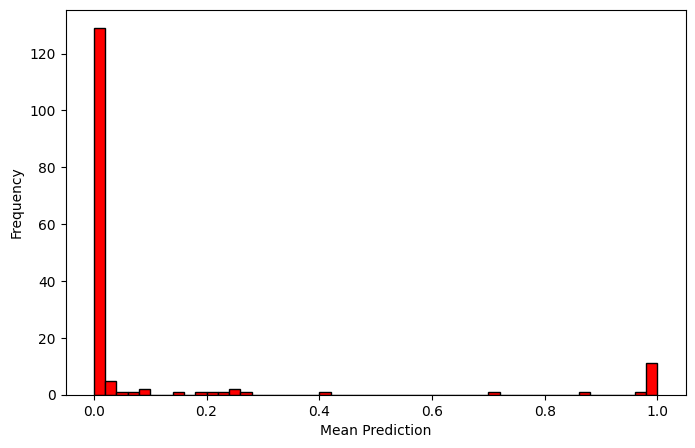

In [30]:
%matplotlib inline
all_mean = mean_preds.flatten().cpu().numpy()
plt.figure(figsize=(8,5))
plt.hist(all_mean, bins=50, color="red",edgecolor="black")
plt.xlabel("Mean Prediction")
plt.ylabel("Frequency")

In [39]:
#Uncertain class
labels_map[mean_preds.argmax(dim=1).max().item()]

'Ankle Boot'

# Variance Uncertainty Prediction
1. Model shows almost no epistemic uncertainty, there are a large numer of samples the model trust completely as compared to the others.



Text(0, 0.5, 'Frequency')

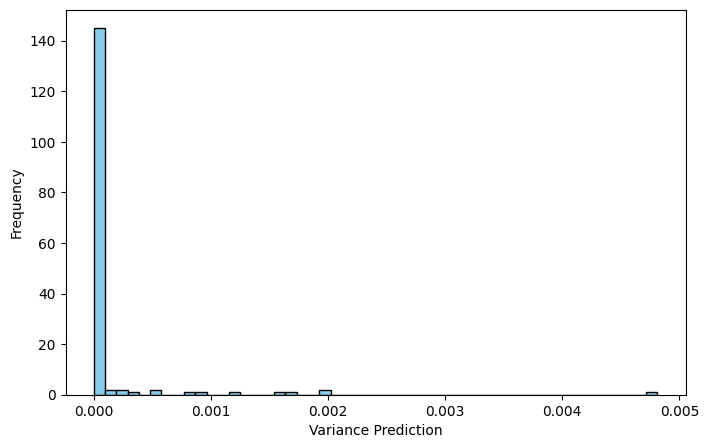

In [32]:
%matplotlib inline
all_var = var_preds.flatten().cpu().numpy()
plt.figure(figsize=(8,5))
plt.hist(all_var, bins=50, color="skyblue",edgecolor="black")
plt.xlabel("Variance Prediction")
plt.ylabel("Frequency")

In [38]:
# uncertainty prediction for variance
labels_map[var_preds.argmax(dim=1).max().item()]

'Ankle Boot'

# Insight:
Ankle boot class: The model is uncertain when it does predict it due to high variance but is very confident when it does. Could be that the model didn't learn its features really well due to preprocessing issues or lack of examples for it.

When deployed into production, the model should be doubled checked with human in the mix for the ankle boots class for false negatives.
Tracking Prediction frequency across batches could further prioritize classes needing review.

In [ ]:
torch.save(model, 'model.pth')

#what i learnt:
1. calling model.foward(x) directly just pulls out the forward method and doesn't taking into account other stuff built into the model like train and evaluate.
2. Don't assume the way you learnt how to build stuff is the standard way.
3. Uncertainty quantification.

# what i could do better:
1. Look for the standard way a framework is used and build adaptations from there.
2. Don't try to adapt with limited knowledge. Recipe for error.